# Tracking Business Safety Across Neighbourhoods in Toronto, ON

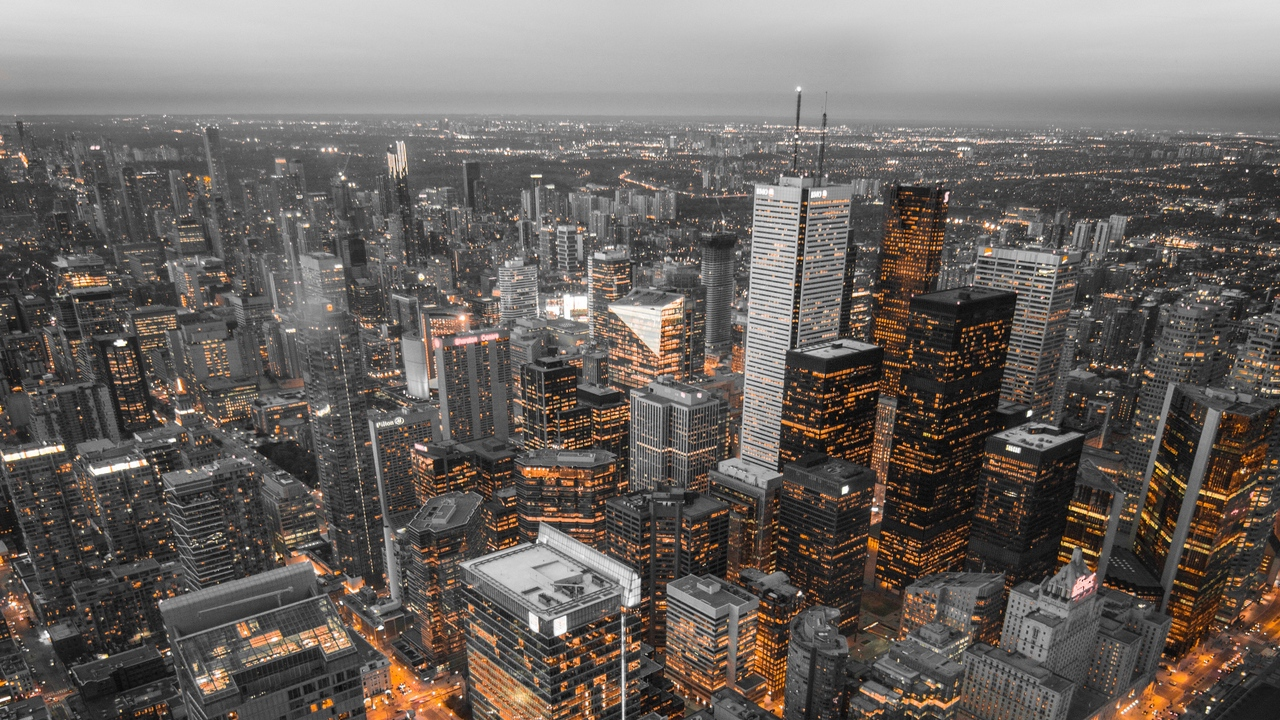

In [39]:
# Imports image of Toronto.
from IPython.display import Image

# File path from Jupyter Notebooks.
PATH = "Toronto Crime Analysis/TO_Financial_District.jpg"

# Selecting image name from folder.
Image(filename = "TO_Financial_District.jpg")

### Problem Description

Toronto is the biggest city and the financial centre of Canada, however similar to every other big city, Toronto has it's share of crime. Based on the type of crime and the frequency of that crime, businesses may be discouraged to enter and setup locations or continue operating, which can present negative impacts on the overall city economy. This analysis will attempt to show which types of crime that owners of various types of businesses should be aware of when operating. 

The problems this project will attempt to solve is: 

1. Determining the top 5 most common types of crime that different types of businesses experience in Chicago.
2. Determining the most common types of businesses that exist in each community area of Chicago.

This type of analysis could be useful for business owners, city law enforcement and the policy makers of the city government who are trying to target specific areas in Chicago to improve safety and make them attractive for businesses to operate safely in. Understanding the type of crime that different types of businesses are exposed to could give new or existing businesses an idea of potential external costs they will have to endure if they wish to operate. This also helps city law enforcement and city policy makers connect different crime types to different businesses types and initiate the necessary actions to decrease specific crime types in community areas with a high density of businesses that are targets of that crime type.

### Data

The crime dataset used in this analysis is sourced from the Toronto Police Service Public Safety Data Portal (http://data.torontopolice.on.ca/datasets/mci-2014-to-2019/data?page=4).

The dataset consists of 206,435 crime records from 2014-2019 across all neighbourhoods in Toronto. 

The dataset provides useful attributes such as:
1. Reported time and date and occurrence time and date for each crime record and drills down further by splitting the data into exact year, month, day number, day name and hour. 
2. Crime Records are organized on 5 location types: commercial, apartment, house, outside and other.
3. Crime Records are organized on 5 crime types: assault, auto theft, break and enter, robbery and theft over.
4. Neighbourhood information is provided per crime record.
5. Latitude and longitude data is provided for each crime record.

Foursquare data will also be used to find the most common venues near each crime location. 

Toronto Neighbourhood data was collected from Wikipedia (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M).

### Methodology

Crime data from the Toronto Police Service Public Safety Data Portal was downloaded as a csv file. Data cleaning involved changing MCI (Major Crime Indicator) column name to "Crime_Type". "offence" column was removed as it listed the same information as the "Crime_Type" column. The original first 2 columns named "X" and "Y" were removed as the location data in these columns were repeated in the "Lat" and "Long" columns. "premisetype" column name was changed to "Location_Type". Numbers in the "Neighbourhood" column were removed.

"Index_", "ucr_ext", "ObjectId", "ucr_code" columns were removed from the dataset.

Nearby venue data was retrieved directly through Foursquare using user account credentials. The data was not downloaded as a csv file, but rather retrieved through an online API connection.

### Results

Theft appears to be the most common crime among most wards in Chicago.
The results show that wards with fewer restaurants or businesses with less foot traffic lead to Theft being the most frequent type of crime committed. This is potentially due to that fact that less people are there to witness theft in that ward.

### Conclusion

This analysis proves that the theory is correct.

## Appendix

### Loading Libraries

In [1]:
# Library to handle data in a vectorized manner.
import numpy as np

# Library for data analysis.
import pandas as pd

In [2]:
pip install geopy

     |████████████████████████████████| 112kB 8.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### Loading Datasets

In [196]:
# Imports Toronto crime data into a dataframe called df_TO_Crime.
df_TO_Crime = pd.read_csv('TO_Crime_Data.csv')

# Imports Toronto neighbourhood data into a dataframe called df_TO_Neighbourhoods.
df_TO_Neighbourhoods = pd.read_csv('TO_Neighbourhoods.csv')

# Imports Toronto FSA latitude/longitude data into a dataframe called df_TO_FSA_Location_Coordinates.
df_TO_FSA_Location_Coordinates = pd.read_csv('Geospatial_Coordinates.csv')

In [197]:
# Displays the first 5 rows, number can be inserted into brackets to display more rows/records.
df_TO_Neighbourhoods.head()

,Postal Code,Borough,Neighbourhood
0,M1A,NaN,NaN
1,M2A,NaN,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,VictoriaVillage
4,M5A,Downtown Toronto,RegentPark


In [198]:
# Indicates the dimensions of the dataframe. 286 records with 3 attributes (i.e. neighbourhood, borough, FSA code).
df_TO_Neighbourhoods.shape

(286, 3)

In [199]:
df_TO_FSA_Location_Coordinates.head()

,Postal Code,Latitude,Longitude,Unnamed: 3
0,M1B,43.806686,-79.194353,NaN
1,M1C,43.784535,-79.160497,NaN
2,M1E,43.763573,-79.188711,NaN
3,M1G,43.770992,-79.216917,NaN
4,M1H,43.773136,-79.239476,NaN


In [200]:
df_TO_FSA_Location_Coordinates.shape

(103, 4)

## Data Cleaning and Manipulation

In [201]:
# Drops specific columns.
df_TO_Crime.drop('occurrencedate', axis= 1, inplace= True)
df_TO_Crime.drop('reporteddate', axis= 1, inplace= True)
df_TO_Crime.drop('reportedyear', axis= 1, inplace= True)
df_TO_Crime.drop('reportedmonth', axis= 1, inplace= True)
df_TO_Crime.drop('reportedday', axis= 1, inplace= True)
df_TO_Crime.drop('reporteddayofyear', axis= 1, inplace= True)
df_TO_Crime.drop('reporteddayofweek', axis= 1, inplace= True)
df_TO_Crime.drop('reportedhour', axis= 1, inplace= True)
df_TO_Crime.drop('occurrencemonth', axis= 1, inplace= True)
df_TO_Crime.drop('occurrenceday', axis= 1, inplace= True)
df_TO_Crime.drop('occurrencedayofyear', axis= 1, inplace= True)
df_TO_Crime.drop('occurrencedayofweek', axis= 1, inplace= True)
df_TO_Crime.drop('occurrencehour', axis= 1, inplace= True)
df_TO_Crime.drop('Division', axis= 1, inplace= True)
df_TO_Crime.drop('Hood_ID', axis= 1, inplace= True)

# Displays the first 5 rows, number can be inserted into brackets to display more rows/records.
df_TO_Crime.head()

,event_unique_id,Location_Type,occurrenceyear,Crime_Type,Neighbourhood,Lat,Long
0,GO-20152165447,Commercial,2015.0,Assault,University,43.656982,-79.405228
1,GO-20151417245,Commercial,2015.0,Assault,TamO'Shanter-Sullivan,43.778732,-79.307907
2,GO-20151421107,Apartment,2015.0,Break and Enter,Woburn,43.765942,-79.225029
3,GO-20152167714,Other,2015.0,Break and Enter,CentennialScarborough,43.778648,-79.140823
4,GO-20152169954,Commercial,2015.0,Assault,Taylor-Massey,43.691235,-79.288361


In [202]:
# Renames column named occurrenceyear to Occurrence Year.
df_TO_Crime = df_TO_Crime.rename(columns={"event_unique_id": "Case_ID"})
df_TO_Crime = df_TO_Crime.rename(columns={"occurrenceyear": "Occurrence_Year"})
df_TO_Crime = df_TO_Crime.rename(columns={"Lat": "Latitude"})
df_TO_Crime = df_TO_Crime.rename(columns={"Long": "Longitude"})

In [203]:
# Indexes dataframe by neighbourhood, so that attribute is emphasized.
df_TO_Crime.set_index("Neighbourhood")

,Case_ID,Location_Type,Occurrence_Year,Crime_Type,Latitude,Longitude
Neighbourhood,,,,,,
University,GO-20152165447,Commercial,2015.0,Assault,43.656982,-79.405228
TamO'Shanter-Sullivan,GO-20151417245,Commercial,2015.0,Assault,43.778732,-79.307907
Woburn,GO-20151421107,Apartment,2015.0,Break and Enter,43.765942,-79.225029
CentennialScarborough,GO-20152167714,Other,2015.0,Break and Enter,43.778648,-79.140823
Taylor-Massey,GO-20152169954,Commercial,2015.0,Assault,43.691235,-79.288361
...,...,...,...,...,...,...
Willowridge-Martingrove-Richview,GO-2019336030,Outside,2019.0,Auto Theft,43.682293,-79.563538
SouthRiverdale,GO-2019336549,Commercial,2019.0,Auto Theft,43.656227,-79.348709
WestHumber-Clairville,GO-2019187512,House,2019.0,Auto Theft,43.743992,-79.598869


In [32]:
# Adds filter to set year to 2019 so that only 2019 data is listed and stored into new dataframe called TO_crime.
years_filter = df_TO_Crime.Occurrence_Year > 2018
df_TO_Crime = df_TO_Crime[years_filter]

In [204]:
# Indicates the dimensions of the dataframe. 206,435 crime records with 22 attributes.
df_TO_Crime.shape

(206435, 7)

In [205]:
# Left join both dataframes. This is done to include latitudes and longitudes of each Neighbourhood based on FSA/Postal Code.
df_TO_Location = pd.merge(df_TO_Neighbourhoods, df_TO_FSA_Location_Coordinates, on="Postal Code", how='left')

In [206]:
# Drops column with title "Unnamed".
df_TO_Location.drop(df_TO_Location.columns[df_TO_Location.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [207]:
df_TO_Location

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1A,NaN,NaN,NaN,NaN
1,M2A,NaN,NaN,NaN,NaN
2,M3A,North York,Parkwoods,43.753259,-79.329656
3,M4A,North York,VictoriaVillage,43.725882,-79.315572
4,M5A,Downtown Toronto,RegentPark,43.654260,-79.360636
...,...,...,...,...,...
281,M8Z,Etobicoke,TheQueenswayWest,43.628841,-79.520999
282,M8Z,Etobicoke,SouthofBloor,43.628841,-79.520999
283,M8Z,Etobicoke,KingswayParkSouthWest,43.628841,-79.520999
284,M8Z,Etobicoke,RoyalYorkSouthWest,43.628841,-79.520999


In [208]:
# Drops missing values in df_TO_Location dataframe.
df_TO_Location = df_TO_Location.dropna()

In [209]:
df_TO_Location

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.753259,-79.329656
3,M4A,North York,VictoriaVillage,43.725882,-79.315572
4,M5A,Downtown Toronto,RegentPark,43.654260,-79.360636
5,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
6,M6A,North York,LawrenceManor,43.718518,-79.464763
...,...,...,...,...,...
280,M8Z,Etobicoke,MimicoNW,43.628841,-79.520999
281,M8Z,Etobicoke,TheQueenswayWest,43.628841,-79.520999
282,M8Z,Etobicoke,SouthofBloor,43.628841,-79.520999
283,M8Z,Etobicoke,KingswayParkSouthWest,43.628841,-79.520999


In [210]:
# Left join both dataframes. Now crime records include FSA codes and Borough information.
df_TO = pd.merge(df_TO_Crime, df_TO_Location, on="Neighbourhood", how='left')

In [212]:
# Done to keep original latitude and longitude data from crime records.
df_TO.drop('Latitude_y', axis= 1, inplace= True)
df_TO.drop('Longitude_y', axis= 1, inplace= True)

In [214]:
# Renames Latitude_x to Latitude and Longitude_x to Longitude
df_TO = df_TO.rename(columns={"Latitude_x": "Latitude"})
df_TO = df_TO.rename(columns={"Longitude_x": "Longitude"})

In [215]:
df_TO

,Case_ID,Location_Type,Occurrence_Year,Crime_Type,Neighbourhood,Latitude,Longitude,Postal Code,Borough
0,GO-20152165447,Commercial,2015.0,Assault,University,43.656982,-79.405228,NaN,NaN
1,GO-20151417245,Commercial,2015.0,Assault,TamO'Shanter-Sullivan,43.778732,-79.307907,NaN,NaN
2,GO-20151421107,Apartment,2015.0,Break and Enter,Woburn,43.765942,-79.225029,M1G,Scarborough
3,GO-20152167714,Other,2015.0,Break and Enter,CentennialScarborough,43.778648,-79.140823,NaN,NaN
4,GO-20152169954,Commercial,2015.0,Assault,Taylor-Massey,43.691235,-79.288361,NaN,NaN
...,...,...,...,...,...,...,...,...,...
206430,GO-2019336030,Outside,2019.0,Auto Theft,Willowridge-Martingrove-Richview,43.682293,-79.563538,NaN,NaN
206431,GO-2019336549,Commercial,2019.0,Auto Theft,SouthRiverdale,43.656227,-79.348709,NaN,NaN
206432,GO-2019187512,House,2019.0,Auto Theft,WestHumber-Clairville,43.743992,-79.598869,NaN,NaN
206433,GO-2019336549,Commercial,2019.0,Auto Theft,SouthRiverdale,43.656227,-79.348709,NaN,NaN


In [218]:
# Drops missing values in df_TO dataframe. The records included records without a Postal Code and Borough.
df_TO = df_TO.dropna()

In [220]:
# Final Toronto dataframe, which will be used for remainder of the analysis.
df_TO

,Case_ID,Location_Type,Occurrence_Year,Crime_Type,Neighbourhood,Latitude,Longitude,Postal Code,Borough
2,GO-20151421107,Apartment,2015.0,Break and Enter,Woburn,43.765942,-79.225029,M1G,Scarborough
14,GO-20152101269,Other,2015.0,Assault,Malvern,43.814213,-79.209801,M1B,Scarborough
18,GO-20152157945,House,2015.0,Break and Enter,Woburn,43.766937,-79.240952,M1G,Scarborough
20,GO-20152161385,House,2015.0,Break and Enter,AgincourtNorth,43.811119,-79.261574,M1V,Scarborough
21,GO-20152163999,Apartment,2015.0,Assault,Woburn,43.760220,-79.216789,M1G,Scarborough
...,...,...,...,...,...,...,...,...,...
206398,GO-2019189748,Outside,2019.0,Auto Theft,Milliken,43.824169,-79.305084,M1V,Scarborough
206403,GO-2019192612,Outside,2019.0,Auto Theft,TheBeaches,43.680252,-79.290695,M4E,East Toronto
206406,GO-2019185627,House,2019.0,Auto Theft,AgincourtNorth,43.802719,-79.282257,M1V,Scarborough
206421,GO-2019326856,House,2019.0,Auto Theft,AgincourtNorth,43.814259,-79.268341,M1V,Scarborough


## Data Analysis

In [221]:
# Provides descriptive statisitics for df_TO_Crime dataframe.
df_TO.describe()

,Occurrence_Year,Latitude,Longitude
count,44215.000000,44215.000000,44215.000000
mean,2016.514531,43.739240,-79.313720
std,1.781237,0.057853,0.118445
min,2000.000000,43.587093,-79.584366
25%,2015.000000,43.702518,-79.382683
50%,2017.000000,43.754631,-79.276031
75%,2018.000000,43.776882,-79.222259
max,2019.000000,43.850788,-79.123100


Quick Analysis: 50% of Crime in Toronto during 2000-2019 occurred between 2015 incidents and 2018 incidents with the average being in 2016.

We can visualize this in a box plot.

### Figure 1: Distribution of crime in Toronto

Text(0, 0.5, 'Number of Crime Records')

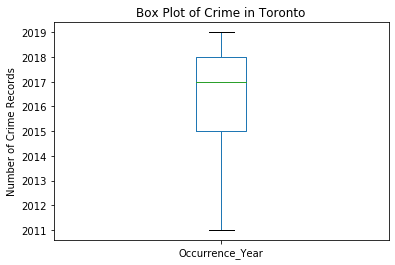

In [224]:
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Plots a box plot figure.
df_TO['Occurrence_Year'].plot(kind = 'box', showfliers=False)
plt.title('Box Plot of Crime in Toronto')
plt.ylabel('Number of Crime Records')

Assume that anything within the interquartile range is average amount of crime occurrences. Anything years below the interquartile range can be classified as years with lower crime and any years above the interquartile range can be classified as years with high crime.

In [225]:
# Map rendering library
import folium 

import geopy
# Converts an address into latitude and longitude values.
from geopy.geocoders import Nominatim 

address = 'Toronto'

geolocator = Nominatim(user_agent="TO_Explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# Prints location data for the city of Toronto.
print('The geograpical coordinates of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


### Figure 2: Neighbourhood map of Toronto

In [227]:
# Creates map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# Adds markers to map by getting information from the df_TO dataframe.
for lat, lng, Neighbourhood in zip(df_TO_Location['Latitude'], df_TO_Location['Longitude'], df_TO_Location['Neighbourhood']):
    # Label names for each marker.
    label = folium.Popup('Neighbourhood: ' + str(Neighbourhood), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        # popup label that appears when a marker is clicked on the map
        popup=label,
        # Colour of marker.
        color='blue',
        parse_html=False).add_to(map_toronto)  
    
map_toronto

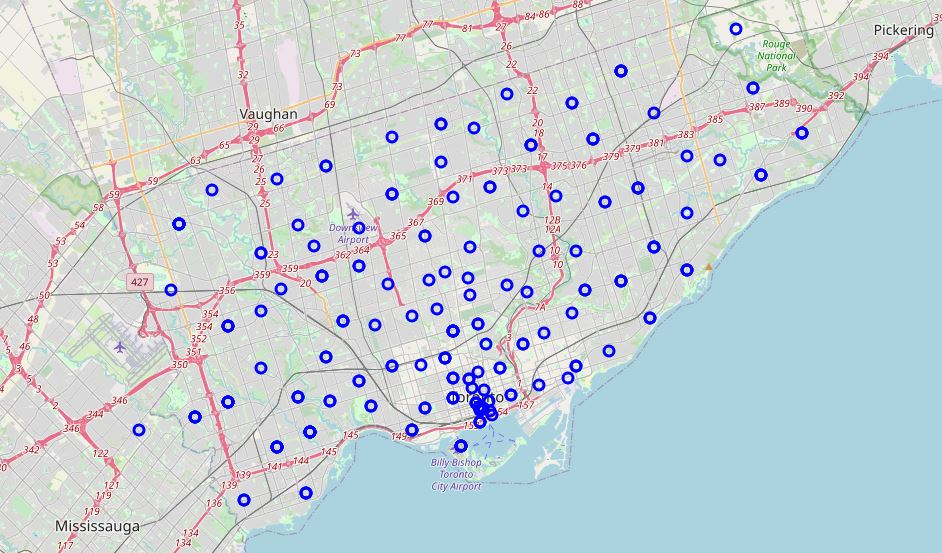

In [228]:
# Screenshot of the map created above
from IPython.display import Image

# Path to folder in Jupyter Notebooks
PATH = "Toronto Crime Analysis/TO Neighbourhood Map.JPG"
Image(filename = "TO Neighbourhood Map.JPG")

In [229]:
# Indicates how many unique types of Crime_Type there are, which are the different types of crime committed.
print('There are {} unique crime types.'.format(len(df_TO_Crime['Crime_Type'].unique())))

There are 5 unique crime types.


### Table 1: Count of all crime types

In [230]:
# Creates table to show count for each crime type.
crimetype_data = df_TO.groupby(['Crime_Type']).size().to_frame(name='Count').reset_index()
crimetype_data

,Crime_Type,Count
0,Assault,24550
1,Auto Theft,4788
2,Break and Enter,8918
3,Robbery,4774
4,Theft Over,1185


### Figure 3: Count of all crime types

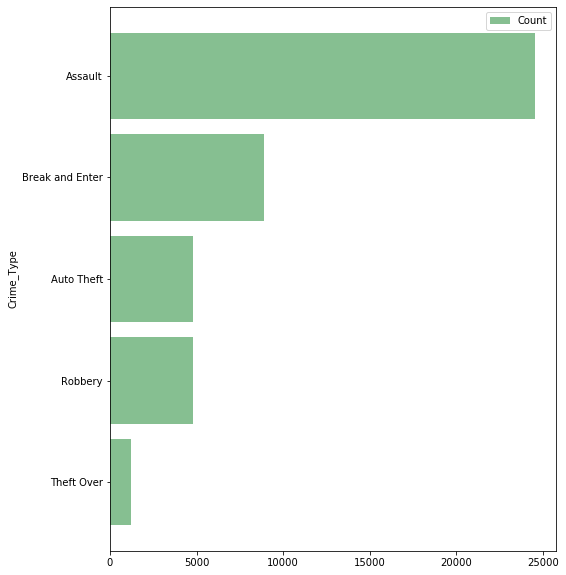

In [231]:
# Plots horizontal bar chart to show visualization of count per crime type from highest to lowest.
crimetype_data.sort_values('Count', inplace=True)
crimetype_data.plot(x='Crime_Type', y='Count', kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

### Table 2: Count of crime records per crime type per neighbourhood type per borough

In [236]:
# Creates pivot table to show count of crime type in each location type per neighbourhood in Toronto.
crimepivot = df_TO.pivot_table(index='Borough', columns=['Crime_Type','Neighbourhood'], aggfunc=pd.Series.count, fill_value=0)
crimepivot

Case_ID                                         \
Crime_Type              Assault                                          
Neighbourhood    AgincourtNorth Alderwood BathurstManor BayviewVillage   
Borough                                                                  
Downtown Toronto              0         0             0              0   
East Toronto                  0         0             0              0   
East York                     0         0             0              0   
Etobicoke                     0       218             0              0   
North York                    0         0           303            460   
Scarborough                 449         0             0              0   
West Toronto                  0         0             0              0   
York                          0         0             0              0   

                                                                          \
Crime_Type                                                                 
Neighbourhood    Cliffcrest DorsetPark Guildwood HenryFarm HighlandCreek   
Borough                                                                    
Downtown Toronto          0          0         0         0             0   
East Toronto              0          0         0         0             0   
East York                 0          0         0         0             0   
Etobicoke                 0          0         0         0             0   
North York                0          0         0       445             0   
Scarborough             661       1058       249         0           325   
West Toronto              0          0         0         0             0   
York                      0          0         0         0             0   

                                   ... Postal Code                     \
Crime_Type                         ...  Theft Over                      
Neighbourhood    HillcrestVillage  ...  RegentPark Roncesvalles Rouge   
Borough                            ...                                  
Downtown Toronto                0  ...          26            0     0   
East Toronto                    0  ...           0            0     0   
East York                       0  ...           0            0     0   
Etobicoke                       0  ...           0            0     0   
North York                    346  ...           0            0     0   
Scarborough                     0  ...           0            0    71   
West Toronto                    0  ...           0           34     0   
York                            0  ...           0            0     0   

                                                                \
Crime_Type                                                       
Neighbourhood    ScarboroughVillage TheBeaches ThorncliffePark   
Borough                                                          
Downtown Toronto                  0          0               0   
East Toronto                      0         37               0   
East York                         0          0              43   
Etobicoke                         0          0               0   
North York                        0          0               0   
Scarborough                      16          0               0   
West Toronto                      0          0               0   
York                              0          0               0   

                                                         
Crime_Type                                               
Neighbourhood    VictoriaVillage WestHill Weston Woburn  
Borough                                                  
Downtown Toronto               0        0      0      0  
East Toronto                   0        0      0      0  
East York                      0        0      0      0  
Etobicoke                      0        0      0      0  
North York                    30        0      0      0  
Scarborough                   

### Adding Dummy Variables using 'One Hot' Encoding Python Technique

In [242]:
# Columns which contains numerical categorical data are split to many columns depending on the number of categories present in that column. 
# Each column contains '0' or '1' corresponding to which column it has been placed.

# Code is basically indicating the crime type and borough for each crime record.
onehot = pd.get_dummies(df_TO[['Crime_Type']], prefix="", prefix_sep="")

# Adds neighbourhood column back to dataframe.
onehot['Borough'] = df_TO['Borough'] 

onehot.head()

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Borough
2,0,0,1,0,0,Scarborough
14,1,0,0,0,0,Scarborough
18,0,0,1,0,0,Scarborough
20,0,0,1,0,0,Scarborough
21,1,0,0,0,0,Scarborough


In [243]:
# Indicates dimensions of onehot encoding dataframe
onehot.shape

(44215, 6)

### Table 3: Frequency of crime per Toronto borough

In [289]:
grouped = onehot.groupby('Borough').mean().reset_index()

# Note: The sum of all column values for each row is 1 (100%). The number in each cell represents relative frequency.
# Shows the proportion of each crime type that each neighbourhood witnessed.
grouped

,Borough,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,Downtown Toronto,0.634030,0.056084,0.195817,0.089354,0.024715
1,East Toronto,0.504036,0.087892,0.265471,0.109417,0.033184
2,East York,0.647841,0.062016,0.169435,0.073090,0.047619
3,Etobicoke,0.491228,0.120567,0.247107,0.109742,0.031355
4,North York,0.476473,0.177526,0.221619,0.079796,0.044587
5,Scarborough,0.578476,0.094546,0.188755,0.116160,0.022063
6,West Toronto,0.529275,0.074814,0.277416,0.088290,0.030204
7,York,0.548588,0.137853,0.174576,0.119209,0.019774


In [244]:
# Number of Toronto borough by number of crime types
grouped.shape

(8, 6)

### Individual Frequency Tables of Crime Types per Borough

In [245]:
top_Crime_Type = 5

# Introducing count variable for looping.
count = 0

for Borough in grouped['Borough']:
    
    # Used to indicate neighbourhood number.
    count = count + 1
    
    # Title for each table.
    print("----"+'Borough'+"----")
    
    temp = grouped[grouped['Borough'] == Borough].T.reset_index()
    
    # Names the columns for each table.
    temp.columns = [Borough,'freq (%)']
    temp = temp.iloc[1:]
    
    # References the 'freq' column and changes type to float.
    temp['freq (%)'] = temp['freq (%)'].astype(float)
    
    # Converts values to percentage.
    temp['freq (%)'] = temp['freq (%)']*100
    
    # Rounds to 2 decimal places.
    temp = temp.round({'freq (%)': 2})
    
    # Sorts values from highest to lowest.
    print(temp.sort_values('freq (%)', ascending=False).reset_index(drop=True).head(top_Crime_Type))
    print('\n')

----Borough----
  Downtown Toronto  freq (%)
0          Assault     63.40
1  Break and Enter     19.58
2          Robbery      8.94
3       Auto Theft      5.61
4       Theft Over      2.47


----Borough----
      East Toronto  freq (%)
0          Assault     50.40
1  Break and Enter     26.55
2          Robbery     10.94
3       Auto Theft      8.79
4       Theft Over      3.32


----Borough----
         East York  freq (%)
0          Assault     64.78
1  Break and Enter     16.94
2          Robbery      7.31
3       Auto Theft      6.20
4       Theft Over      4.76


----Borough----
         Etobicoke  freq (%)
0          Assault     49.12
1  Break and Enter     24.71
2       Auto Theft     12.06
3          Robbery     10.97
4       Theft Over      3.14


----Borough----
        North York  freq (%)
0          Assault     47.65
1  Break and Enter     22.16
2       Auto Theft     17.75
3          Robbery      7.98
4       Theft Over      4.46


----Borough----
       Scarborough  freq

In [246]:
def return_most_common_Crime_Type(row, num_top_Crime_Type):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_Crime_Type]

### Table 4: Ranking the top 5 crime types by borough

In [247]:
top_Crime_Type = 5

# Adds the suffix for each number for each column title.
indicators = ['st', 'nd', 'rd']

# Creates columns according to number of top venues types.
columns = ['Borough']
for ind in np.arange(top_Crime_Type):
    try:
        columns.append('{}{} Most Common Type of Crime'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Type of Crime'.format(ind+1))

# Creates a new dataframe for top 5 common venues in each borough.
Borough_sorted = pd.DataFrame(columns=columns)
Borough_sorted['Borough'] = grouped['Borough']

for ind in np.arange(grouped.shape[0]):
    Borough_sorted.iloc[ind, 1:] = return_most_common_Crime_Type(grouped.iloc[ind, :], top_Crime_Type)

Borough_sorted

,Borough,1st Most Common Type of Crime,2nd Most Common Type of Crime,3rd Most Common Type of Crime,4th Most Common Type of Crime,5th Most Common Type of Crime
0,Downtown Toronto,Assault,Break and Enter,Robbery,Auto Theft,Theft Over
1,East Toronto,Assault,Break and Enter,Robbery,Auto Theft,Theft Over
2,East York,Assault,Break and Enter,Robbery,Auto Theft,Theft Over
3,Etobicoke,Assault,Break and Enter,Auto Theft,Robbery,Theft Over
4,North York,Assault,Break and Enter,Auto Theft,Robbery,Theft Over
5,Scarborough,Assault,Break and Enter,Robbery,Auto Theft,Theft Over
6,West Toronto,Assault,Break and Enter,Robbery,Auto Theft,Theft Over
7,York,Assault,Break and Enter,Auto Theft,Robbery,Theft Over


In [248]:
Borough_sorted.shape

(8, 6)

## Foursquare Data: Finding Nearby Businesses

In [275]:
# Foursquare credentials used to get data from Foursquare
CLIENT_ID = '4OMZ1YK3XOWTCNXLR1HPCAARK10XH0XUX1RAXLNAQAOVRUMJ'
CLIENT_SECRET = 'XGD4B4J3RMYYB15WUSVHAUO0HTFGIV03XILCCG0BBFZY0131' 

# Foursquare API version
VERSION = '20180605'

In [276]:
# Limits the number of venues returned by Foursquare API to 50.
LIMIT = 50

# defines radius
radius = 500

# create the API request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

# displays URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=4OMZ1YK3XOWTCNXLR1HPCAARK10XH0XUX1RAXLNAQAOVRUMJ&client_secret=XGD4B4J3RMYYB15WUSVHAUO0HTFGIV03XILCCG0BBFZY0131&v=20180605&ll=43.6534817,-79.3839347&radius=500&limit=50'

In [277]:
# library to handle requests
import requests 

import json

# makes the GET request
results = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [285]:
venues = results['response']['groups'][0]['items']

import sys
# tranforms JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# flattens JSON
nearby_venues = json_normalize(venues)

KeyError: 'groups'

In [171]:
# filters columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filters the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# cleans columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

NameError: name 'nearby_venues' is not defined

In [55]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

50 venues were returned by Foursquare.


### Retrieving venues near the crime occurrences

In [273]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'        
                   ]
    
    return(nearby_venues)

In [274]:
venues = getNearbyVenues(names=df_TO['Borough'],latitudes=df_TO['Latitude'],longitudes=df_TO['Longitude'])

Scarborough


KeyError: 'groups'

In [ ]:
print(venues.shape)
venues.head()

In [259]:
df_TO

,Case_ID,Location_Type,Occurrence_Year,Crime_Type,Neighbourhood,Latitude,Longitude,Postal Code,Borough
2,GO-20151421107,Apartment,2015.0,Break and Enter,Woburn,43.765942,-79.225029,M1G,Scarborough
14,GO-20152101269,Other,2015.0,Assault,Malvern,43.814213,-79.209801,M1B,Scarborough
18,GO-20152157945,House,2015.0,Break and Enter,Woburn,43.766937,-79.240952,M1G,Scarborough
20,GO-20152161385,House,2015.0,Break and Enter,AgincourtNorth,43.811119,-79.261574,M1V,Scarborough
21,GO-20152163999,Apartment,2015.0,Assault,Woburn,43.760220,-79.216789,M1G,Scarborough
...,...,...,...,...,...,...,...,...,...
206398,GO-2019189748,Outside,2019.0,Auto Theft,Milliken,43.824169,-79.305084,M1V,Scarborough
206403,GO-2019192612,Outside,2019.0,Auto Theft,TheBeaches,43.680252,-79.290695,M4E,East Toronto
206406,GO-2019185627,House,2019.0,Auto Theft,AgincourtNorth,43.802719,-79.282257,M1V,Scarborough
206421,GO-2019326856,House,2019.0,Auto Theft,AgincourtNorth,43.814259,-79.268341,M1V,Scarborough


In [281]:
# Limits the number of venues returned by Foursquare API to 50.
LIMIT = 50

# defines radius
radius = 500

def Get_Number_Of_Venues(ID, category):
    for i in range(len(df_TO)):
        p_lat = df_TO.iloc[i,6]
        p_lon = df_TO.iloc[i,7]
        url.format(CLIENT_ID,CLIENT_SECRET,p_lat,p_lon,VERSION,ID,radius,LIMIT) 
        test_results = requests.get(url).json()
        test_venue = test_results['response']['venues']
        count = np.shape(test_venue)
        df_TO.loc[i, category] = count[0]

In [282]:
df_TO['Park'] = ''
df_TO['Library'] = ''
df_TO['Pool'] = ''
df_TO['Playground'] = ''
df_TO['Cinemas'] = ''
df_TO.head()

,Case_ID,Location_Type,Occurrence_Year,Crime_Type,Neighbourhood,Latitude,Longitude,Postal Code,Borough,Park,Library,Pool,Playground,Cinemas
2,GO-20151421107,Apartment,2015.0,Break and Enter,Woburn,43.765942,-79.225029,M1G,Scarborough,,,,,
14,GO-20152101269,Other,2015.0,Assault,Malvern,43.814213,-79.209801,M1B,Scarborough,,,,,
18,GO-20152157945,House,2015.0,Break and Enter,Woburn,43.766937,-79.240952,M1G,Scarborough,,,,,
20,GO-20152161385,House,2015.0,Break and Enter,AgincourtNorth,43.811119,-79.261574,M1V,Scarborough,,,,,
21,GO-20152163999,Apartment,2015.0,Assault,Woburn,43.760220,-79.216789,M1G,Scarborough,,,,,


In [283]:
Get_Number_Of_Venues('4bf58dd8d48988d163941735','Park')
Get_Number_Of_Venues( '4bf58dd8d48988d12f941735','Library')
Get_Number_Of_Venues('4bf58dd8d48988d15e941735','Pool')
Get_Number_Of_Venues('4bf58dd8d48988d1e7941735','Playground')
Get_Number_Of_Venues('4bf58dd8d48988d180941735','Cinemas')
df_TO.head(30)

KeyError: 'venues'

In [284]:
df_TO.rename(columns = {'Sum Value':'Crime_ID'}, inplace = True)
df_TO.head()

,Case_ID,Location_Type,Occurrence_Year,Crime_Type,Neighbourhood,Latitude,Longitude,Postal Code,Borough,Park,Library,Pool,Playground,Cinemas
2,GO-20151421107,Apartment,2015.0,Break and Enter,Woburn,43.765942,-79.225029,M1G,Scarborough,,,,,
14,GO-20152101269,Other,2015.0,Assault,Malvern,43.814213,-79.209801,M1B,Scarborough,,,,,
18,GO-20152157945,House,2015.0,Break and Enter,Woburn,43.766937,-79.240952,M1G,Scarborough,,,,,
20,GO-20152161385,House,2015.0,Break and Enter,AgincourtNorth,43.811119,-79.261574,M1V,Scarborough,,,,,
21,GO-20152163999,Apartment,2015.0,Assault,Woburn,43.760220,-79.216789,M1G,Scarborough,,,,,


## K-Means Clustering

In [288]:
TO_cluster = df_TO.iloc[:,5:]
print(df_TO.shape)
print(TO_cluster.shape)
TO_cluster.head()

(44215, 14)
(44215, 9)


,Latitude,Longitude,Postal Code,Borough,Park,Library,Pool,Playground,Cinemas
2,43.765942,-79.225029,M1G,Scarborough,,,,,
14,43.814213,-79.209801,M1B,Scarborough,,,,,
18,43.766937,-79.240952,M1G,Scarborough,,,,,
20,43.811119,-79.261574,M1V,Scarborough,,,,,
21,43.760220,-79.216789,M1G,Scarborough,,,,,


### Finding Optimal Number of Clusters using Elbow Plot

In [286]:
# Imports k-means from clustering stage.
from sklearn.cluster import KMeans

elbow = []
for k in range(1,len(TO_cluster)):
    km = KMeans(n_clusters = k, random_state = 0).fit(TO_cluster)
    elbow.append(km.inertia_)

ValueError: could not convert string to float: 'Scarborough'

### Figure 4: Elbow plot to find optimal k clusters

ValueError: x and y must have same first dimension, but have shapes (206434,) and (0,)

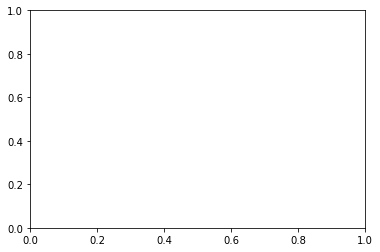

In [80]:
K = range(1,len(TO_cluster))
#plt.figure(figsize =(20,10))
plt.plot(K,  elbow,'bx-')
plt.xlabel('k')  
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [79]:
# Initiates clustering algorithm.



# Sets number of clusters.
kclusters = 10

grouped_clustering = grouped.drop('Neighbourhood', 1)

# Runs k-means clustering.
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# Checks cluster labels generated for each row in the dataframe.
# Shows cluster value for each ward for all Toronto neighbourhoods.
kmeans.labels_[0:100]

array([9, 9, 9, 6, 9, 4, 5, 0, 9, 8, 2, 7, 2, 5, 2, 0, 8, 5, 0, 6, 5, 9,
       0, 2, 2, 4, 6, 2, 6, 2, 0, 0, 6, 7, 2, 2, 8, 2, 7, 0, 4, 0, 5, 1,
       8, 5, 2, 2, 0, 6, 6, 9, 9, 4, 4, 7, 9, 5, 4, 0, 7, 5, 2, 7, 1, 6,
       0, 9, 1, 8, 1, 6, 6, 5, 4, 1, 1, 3, 5, 5, 2, 5, 7, 9, 6, 2, 9, 0,
       2, 9, 2, 5, 2, 5, 2, 6, 0, 4, 2, 0], dtype=int32)

In [ ]:
# Inserts column called 'Cluster Labels' to indicate which cluster each crime record is in.
grouped.insert(0, 'Cluster Labels', kmeans.labels_)

# Left join with df_TO to include location data (i.e. longitude and latitude).
TO_merged=pd.merge(df_TO,grouped,how='left',left_on='Location',right_on='Location')

# Shows top 5 rows
TO_merged.head()

## Random Forests

## Ridge and Lasso Regression